<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_DecisionTree_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial uses codes from these sources, with several adjustments:
- https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
- https://mljar.com/blog/visualize-decision-tree/


In [30]:
# Loading the libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree

In [40]:
# Loading the iris dataset
iris = datasets.load_iris()

# X -> features, y -> label
X = iris.data
y = iris.target

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [46]:
# Training and testing the decision tree model
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)

In [47]:
# Visualize the decision tree - text version
text_representation = tree.export_text(dtree_model)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



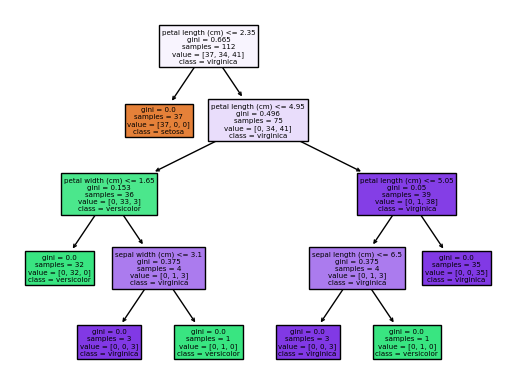

In [48]:
# Visualize the decision tree - tree version
fig = plt.figure()
_ = tree.plot_tree(dtree_model,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [49]:
# Do the prediction
dtree_predictions = dtree_model.predict(X_test)

# Count the accuracy
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

# Show the confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [50]:
# Do the prediction for new data
newdata = [[6.0, 3.0, 5.0, 1.0],[5.0, 2.0, 4.0, 2.0],[5.5, 3.5, 3.5, 2.5],[7.0, 4.0, 6.0, 3.0],[4.5, 4.0, 5.5, 3.0]]
result = dtree_model.predict(newdata)
print(result)

[2 2 1 2 2]
